## TALLER 2
# Jose Manuel Pinzon 
# Natalia Rico Torres
# Daniel Mateo Quito

In [38]:
import pandas as pd
import numpy as np
from random import random
from scipy.stats import norm
from scipy.stats import t
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.stats import binom
import scipy.stats as stats

Ejercicio 1: Tiempo de Espera en una Parada de Autobús

En una parada de autobús, el tiempo de espera para el próximo autobús sigue una distribución exponencial con una tasa de llegada promedio de 4 autobuses por hora.

a) ¿Cuál es la probabilidad de que un pasajero espere menos de 10 minutos por el próximo autobús?

b) Simula en Python 1000 tiempos de espera y representa el histograma de la distribución.

In [13]:

#Buses por hora
Bus_Hora = 4  
#Tiempo esperado para que llegue el bus
t = 10 / 60

Probabilidad = 1 - np.exp(-Bus_Hora * t)

print(f"La probabilidad de esperar menos de 10 minutos es: {Probabilidad:.4f}")


La probabilidad de esperar menos de 10 minutos es: 0.4866


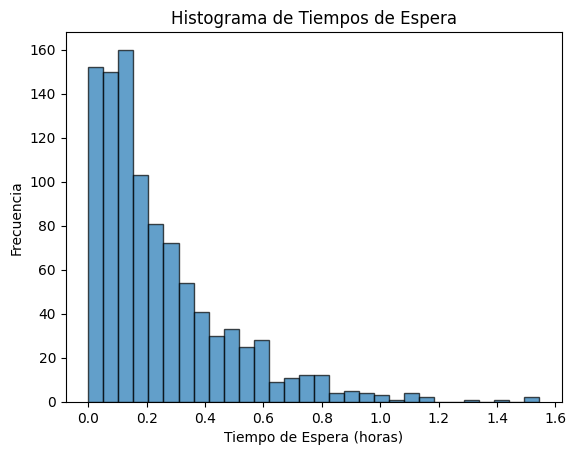

In [16]:
Bus_Hora = 4  
Simulaciones = 1000 

Tiempos_Espera = np.random.exponential(1/Bus_Hora, Simulaciones)

plt.hist(Tiempos_Espera, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histograma de Tiempos de Espera')
plt.xlabel('Tiempo de Espera (horas)')
plt.ylabel('Frecuencia')
plt.show()

Ejercicio 2: Puntuaciones en un Examen

Las puntuaciones de un examen siguen una distribución normal con una media de 70 y una desviación estándar de 8.

a) ¿Cuál es la probabilidad de que un estudiante obtenga una puntuación entre 65 y 85?

b) Si se requiere estar en el 10% superior para aprobar con honores, ¿cuál es la puntuación mínima necesaria?

c) Genera en Python una muestra aleatoria de 500 puntuaciones y representa su distribución mediante un histograma.

In [22]:
mu = 70
sigma = 8

prob_85 = norm.cdf(85, mu, sigma)
prob_65 = norm.cdf(65, mu, sigma)
probabilidad = prob_85 - prob_65

print(f"La probabilidad de obtener una puntuación entre 65 y 85 es: {probabilidad:.4f}")

La probabilidad de obtener una puntuación entre 65 y 85 es: 0.7036


In [24]:
percentil_90 = norm.ppf(0.90, mu, sigma)

print(f"La puntuación mínima necesaria para estar en el 10% superior es: {percentil_90:.2f}")

La puntuación mínima necesaria para estar en el 10% superior es: 80.25


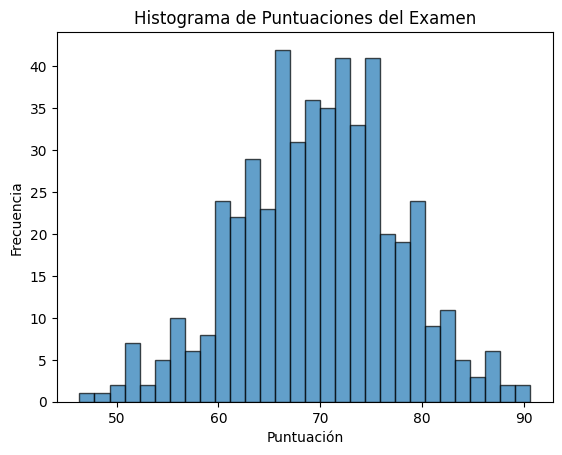

In [25]:
num_samples = 500
puntuaciones = np.random.normal(mu, sigma, num_samples)

plt.hist(puntuaciones, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histograma de Puntuaciones del Examen')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.show()

Ejercicio 3: Defectos en un Proceso de Manufactura

En una línea de producción, el número de defectos por metro de tela sigue una distribución de Poisson con una media de 2 defectos por metro.

a) ¿Cuál es la probabilidad de encontrar exactamente 3 defectos en un metro de tela?

b) ¿Cuál es la probabilidad de que haya al menos un defecto en un metro de tela?

c) Simula en Python el número de defectos en 1000 metros de tela y representa el histograma correspondiente.

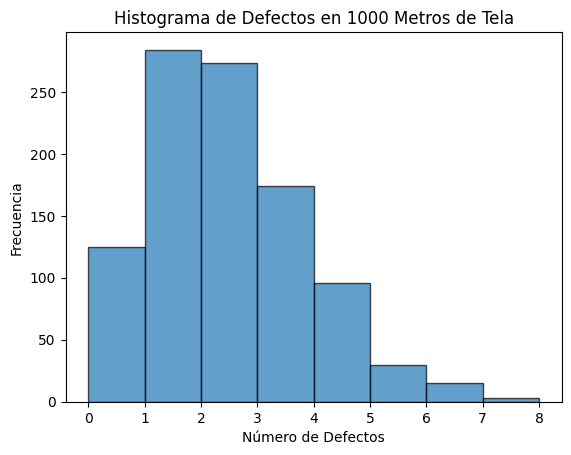

In [26]:
lambda_defectos = 2
metros = 1000

# Simulación de defectos
defectos = np.random.poisson(lambda_defectos, metros)

# Crear un DataFrame para almacenar los datos
df = pd.DataFrame(defectos, columns=['Defectos'])

plt.hist(df['Defectos'], bins=range(0, max(defectos)+1), edgecolor='black', alpha=0.7)
plt.title('Histograma de Defectos en 1000 Metros de Tela')
plt.xlabel('Número de Defectos')
plt.ylabel('Frecuencia')
plt.show()


Ejercicio 4: Vida Útil de una Batería

La vida útil (en horas) de una batería sigue una distribución gamma con forma 
k=3 y escala 
θ=500 horas.

a) ¿Cuál es la probabilidad de que una batería dure más de 1500 horas?

b) Calcula y representa en Python la función de densidad de probabilidad (PDF) de la distribución.

In [28]:
k = 3
theta = 500

# Calcular la probabilidad
probabilidad = 1 - gamma.cdf(1500, a=k, scale=theta)
print(f'Probabilidad de que una batería dure más de 1500 horas: {probabilidad:.4f}')


Probabilidad de que una batería dure más de 1500 horas: 0.4232


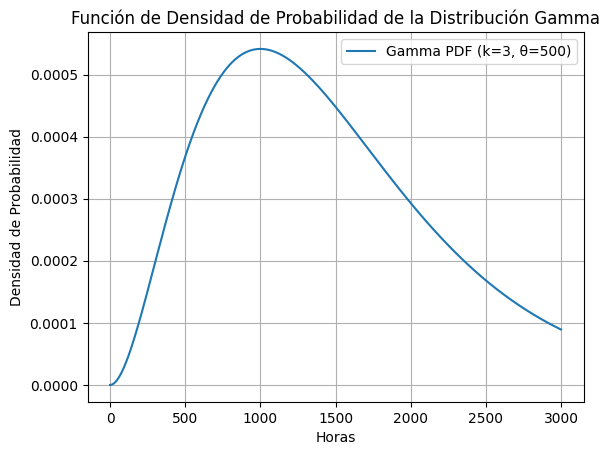

In [29]:
k = 3
theta = 500
x = np.linspace(0, 3000, 1000)


pdf = gamma.pdf(x, a=k, scale=theta)
plt.plot(x, pdf, label=f'Gamma PDF (k={k}, θ={theta})')
plt.title('Función de Densidad de Probabilidad de la Distribución Gamma')
plt.xlabel('Horas')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()


Ejercicio 5: Lluvias en una Región

El número de días de lluvia en un mes en una región sigue una distribución binomial con 
n=30 días y una probabilidad diaria de lluvia de 
p=0.2.

a) ¿Cuál es la probabilidad de que llueva exactamente 8 días en un mes?

b) Simula en Python el número de días de lluvia durante un año (12 meses) y representa la distribución de frecuencias.

In [7]:
n = 30
p = 0.2
k = 8

# Calcular la probabilidad
probabilidad = binom.pmf(k, n, p)
print(f'Probabilidad de que llueva exactamente 8 días en un mes: {probabilidad:.4f}')


Probabilidad de que llueva exactamente 8 días en un mes: 0.1106


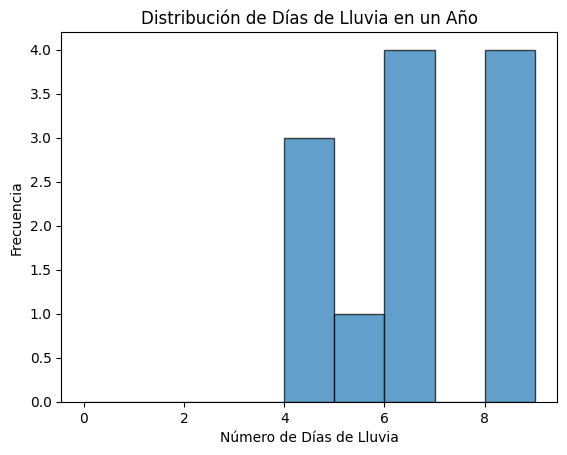

In [32]:

n = 30
p = 0.2
meses = 12

dias_lluvia = np.random.binomial(n, p, meses)
df = pd.DataFrame(dias_lluvia, columns=['Días de Lluvia'])

# Representación de la distribución de frecuencias
plt.hist(df['Días de Lluvia'], bins=range(0, max(dias_lluvia)+1), edgecolor='black', alpha=0.7)
plt.title('Distribución de Días de Lluvia en un Año')
plt.xlabel('Número de Días de Lluvia')
plt.ylabel('Frecuencia')
plt.show()


Ejercicio 6: Control de Calidad en una Fábrica de Bombillas

Una fábrica produce bombillas que, según especificaciones, tienen una vida útil que sigue una distribución normal con una media de 800 horas y una desviación estándar de 50 horas. Un ingeniero sospecha que una nueva máquina está produciendo bombillas con una vida útil diferente. Para comprobarlo, toma una muestra aleatoria de 36 bombillas producidas por la nueva máquina y encuentra que la vida útil media es de 785 horas.

a) Plantee las hipótesis nula y alternativa para probar si la nueva máquina está produciendo bombillas con una vida útil diferente a la especificada.

b) Utilice un nivel de significancia del 5% para realizar la prueba de hipótesis.

c) Calcule el valor p de la prueba.

d) ¿Cuál es su conclusión respecto a la nueva máquina?

In [33]:
n = 36
mu = 800
x_bar = 785
s = 50

# Estadístico t
t_stat = (x_bar - mu) / (s / np.sqrt(n))

# Grados de libertad
df = n - 1

# Valor p
p_value = 2 * t.cdf(t_stat, df)
print(f'Valor p: {p_value:.4f}')


Valor p: 0.0805


In [10]:
# Nivel de significancia
alpha = 0.05

if p_value < alpha:
    conclusion = "Rechazamos la hipótesis nula. La nueva máquina produce bombillas con una vida útil diferente a la especificada."
else:
    conclusion = "No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que la nueva máquina produce bombillas con una vida útil diferente a la especificada."

print(conclusion)


No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que la nueva máquina produce bombillas con una vida útil diferente a la especificada.


Ejercicio 7: Efectividad de un Nuevo Medicamento

Un laboratorio farmacéutico ha desarrollado un nuevo medicamento para reducir la presión arterial. Se sabe que la presión arterial sistólica de la población sigue una distribución normal con una media de 120 mmHg y una desviación estándar de 15 mmHg. Se administra el nuevo medicamento a una muestra de 25 pacientes, y se observa que la presión arterial media es de 112 mmHg.

a) Plantee las hipótesis nula y alternativa para determinar si el medicamento reduce significativamente la presión arterial.

b) Realice la prueba de hipótesis utilizando un nivel de significancia del 1%.

c) Calcule el valor p de la prueba.

d) Interprete los resultados y determine si el medicamento es efectivo.

In [5]:
n = 25
mu = 120
x_bar = 112
s = 15

t_stat = (x_bar - mu) / (s / np.sqrt(n))
df = n - 1
p_value = t.cdf(t_stat, df)
print(f'Valor P es de: {p_value:.4f}')


Valor P es de: 0.0067


In [6]:
alpha = 0.01

if p_value < alpha:
    conclusion = "Se rechaza la hipótesis nula. El medicamento reduce significativamente la presión arterial."
else:
    conclusion = "No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que el medicamento reduce significativamente la presión arterial."

print(conclusion)


Se rechaza la hipótesis nula. El medicamento reduce significativamente la presión arterial.


Ejercicio 8: Tasas de Llegadas en un Centro de Llamadas

El número de llamadas que recibe un centro de atención al cliente sigue una distribución de Poisson con una media de 5 llamadas por minuto. El gerente implementa un nuevo sistema y desea saber si ha afectado la tasa de llamadas. Durante un periodo de 30 minutos, registra un total de 180 llamadas.

a) Plantee las hipótesis para probar si el nuevo sistema ha cambiado la tasa de llamadas.

b) Realice una prueba de hipótesis al nivel de significancia del 5%.

c) Determine si hay evidencia suficiente para concluir que la tasa de llamadas ha cambiado

In [34]:
lambda_esperada = 5
lambda_observada = 6
n = 30

# Estadístico Z
Z = (lambda_observada - lambda_esperada) / (np.sqrt(lambda_esperada / n))

# Valor p (prueba de dos colas)
p_value = 2 * (1 - norm.cdf(abs(Z)))
print(f'Valor p: {p_value:.4f}')


Valor p: 0.0143


In [35]:
alpha = 0.05

if p_value < alpha:
    conclusion = "Rechazamos la hipótesis nula. Hay evidencia suficiente para concluir que la tasa de llamadas ha cambiado."
else:
    conclusion = "No rechazamos la hipótesis nula. No hay evidencia suficiente para concluir que la tasa de llamadas ha cambiado."

print(conclusion)


Rechazamos la hipótesis nula. Hay evidencia suficiente para concluir que la tasa de llamadas ha cambiado.


Ejercicio 9: Preferencia de Marca

Una empresa desea saber si la proporción de clientes que prefieren su marca ha aumentado después de una campaña publicitaria. Antes de la campaña, el 40% de los clientes prefería su marca. Después de la campaña, en una muestra de 200 clientes, 100 indican preferir su marca.

a) Establezca las hipótesis nula y alternativa.

b) Realice una prueba de hipótesis al nivel de significancia del 5%.

c) Calcule el valor p y concluya si la campaña fue efectiva en aumentar la preferencia de marca.

In [36]:
p_0 = 0.40
p_hat = 0.50
n = 200

# Estadístico Z
Z = (p_hat - p_0) / np.sqrt((p_0 * (1 - p_0)) / n)

# Valor p (prueba de una cola)
p_value = 1 - norm.cdf(Z)
print(f'Valor p: {p_value:.4f}')


Valor p: 0.0019


In [37]:
alpha = 0.05

if p_value < alpha:
    conclusion = "Rechazamos la hipótesis nula. La campaña fue efectiva en aumentar la preferencia de marca."
else:
    conclusion = "No rechazamos la hipótesis nula. No hay evidencia suficiente para concluir que la campaña fue efectiva en aumentar la preferencia de marca."

print(conclusion)


Rechazamos la hipótesis nula. La campaña fue efectiva en aumentar la preferencia de marca.


Ejercicio 10: Evaluación de un Programa Educativo


Una escuela implementa un nuevo programa educativo y quiere evaluar su efectividad en las calificaciones de matemáticas. Históricamente, las calificaciones siguen una distribución normal con una media de 70 y una desviación estándar de 10. Después de implementar el programa, una muestra de 50 estudiantes tiene una calificación media de 73.

a) Formule las hipótesis nula y alternativa para determinar si el programa ha mejorado las calificaciones.

b) Utilice un nivel de significancia del 2% para realizar la prueba.

c) ¿El programa educativo ha tenido un impacto significativo en las calificaciones?

In [44]:
mu_0 = 70
sigma = 10
n = 50
x_bar = 73

# Estadístico t
t_stat = (x_bar - mu_0) / (sigma / (n ** 0.5))

# Valor p (una cola)
p_value = 1 - stats.norm.cdf(t_stat)

print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')


Estadístico t: 2.121320343559643
Valor p: 0.01694742676234462


Ejercicio 11: Efectividad de dos métodos de enseñanza

Un investigador educativo quiere comparar la efectividad de dos métodos de enseñanza diferentes en el rendimiento de los estudiantes. Se seleccionan aleatoriamente 30 estudiantes y se dividen en dos grupos de 15 estudiantes cada uno. El primer grupo es enseñado con el método tradicional y el segundo grupo con el nuevo método. Después de un mes, se les aplica un examen estandarizado.

Grupo 1 (Método Tradicional): Media = 75, Desviación estándar = 8
Grupo 2 (Nuevo Método): Media = 80, Desviación estándar = 6
a) Formule las hipótesis nula y alternativa para determinar si hay una diferencia significativa en las medias de los dos grupos.

b) Utilice una prueba t para muestras independientes con un nivel de significancia del 5% para analizar los datos.

c) Interprete los resultados y concluya si el nuevo método es más efectivo.

In [39]:
mean1, std1, n1 = 75, 8, 15
mean2, std2, n2 = 80, 6, 15

# Prueba t
t_stat, p_value = stats.ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2)

print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')


Estadístico t: -1.9364916731037085
Valor p: 0.06295956862103971


Ejercicio 12: Efecto de un programa de ejercicio en la presión arterial

Un médico quiere evaluar si un programa de ejercicio regular reduce la presión arterial sistólica en pacientes hipertensos. Se mide la presión arterial de 20 pacientes antes y después de participar en el programa durante 8 semanas.

Presión arterial media antes: 150 mmHg
Presión arterial media después: 140 mmHg
Desviación estándar de las diferencias: 10 mmHg
a) Establezca las hipótesis nula y alternativa para determinar si el programa reduce la presión arterial.

b) Realice una prueba t para muestras relacionadas (pareadas) al nivel de significancia del 1%.

c) ¿Es efectivo el programa de ejercicio para reducir la presión arterial?

In [42]:
"Hipotesis"
"H0: El programa de ejercicio no reduce la presión arterial"
"H1: El programa de ejercicio reduce la presión arterial"

#prueba t (muestras pareadas)
alpha= 0.01
n= 20
media_antes= 150
media_despues= 140
desviacion_antes= 10

t_statisctic, p_value= stats.ttest_rel(a=media_antes, b=media_despues)

print(f'El valor de t-statistic es: {t_statisctic}')
print(f'El valor de p-value es: {p_value}')

if p_value < alpha:
    print("Rechazar la hipótesis nula. El programa de ejercicio reduce la presión arterial.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. El programa de ejercicio no reduce la presión arterial.")

El valor de t-statistic es: nan
El valor de p-value es: nan
No hay suficiente evidencia para rechazar la hipótesis nula. El programa de ejercicio no reduce la presión arterial.


Ejercicio 13: Comparación de salarios entre dos departamentos

En una empresa, se quiere saber si existe una diferencia en los salarios promedio entre el departamento de ventas y el departamento de marketing. Se toman muestras aleatorias de empleados de ambos departamentos.

Ventas (n = 25): Media = $50,000, Desviación estándar = $5,000
Marketing (n = 30): Media = $52,000, Desviación estándar = $6,000
a) Plantee las hipótesis para probar si hay una diferencia significativa en los salarios medios de los dos departamentos.

b) Realice una prueba t para muestras independientes con un nivel de significancia del 5%, asumiendo que las varianzas son iguales.

c) Concluya si hay una diferencia significativa en los salarios entre los dos departamentos.

In [43]:
#Hipotesis
"H0: Los salarios promedio de ambos departamentos son iguales"
"H1: Los salarios promedio de ambos departamentos son diferentes"
#Prueba t para ambos grupos
"Datos para ventas"
alpha= 0.05
n_s = 25
media_s= 50000
desviacion_s= 5000
n_m= 30
media_m= 52000
desviacion_m= 6000
"Datos para marketing"
n_m= 30
media_m= 52000
desviacion_m= 6000

t_statisctic, p_value= stats.ttest_ind_from_stats(mean1=media_s, std1=desviacion_s, nobs1=n_s, mean2=media_m, std2=desviacion_m, nobs2=n_m)

print(f'El valor de t-statistic es: {t_statisctic}')
print(f'El valor de p-value es: {p_value}')

if p_value < alpha:
    print("Rechazar la hipótesis nula. Las medias de los salarios son significativamente diferentes.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. Las medias de los salarios son iguales.")

El valor de t-statistic es: -1.3260695749411513
El valor de p-value es: 0.19050334294956325
No hay suficiente evidencia para rechazar la hipótesis nula. Las medias de los salarios son iguales.


Ejercicio 14: Asociación entre Género y Preferencia de Producto (Prueba Chi-cuadrado)

Una empresa desea saber si existe una asociación entre el género de los consumidores y su preferencia por tres tipos de productos: A, B y C. Se realiza una encuesta a 200 personas y se obtienen los siguientes resultados:

Producto A	Producto B	Producto C	Total
Hombres	40	30	20	90
Mujeres	20	50	40	110
Total	60	80	60	200
a) Formule las hipótesis nula y alternativa para determinar si hay una asociación significativa entre el género y la preferencia de producto.

b) Realice una prueba chi-cuadrado de independencia al nivel de significancia del 5%.

c) Interprete los resultados y concluya si existe una asociación significativa entre el género y la preferencia de producto.

In [11]:
#Hipotesis nula y alternativa
"H0: No hay asociación entre el género y la preferencia de producto"
"H1: Existe asociación entre el género y la preferencia de producto"

#Test chi-cuadrado
observed = np.array([[40, 30, 20], [20, 50, 40]])
chi2_stat, p_value, dof, expected = chi2_contingency(observed)
print(f'El valor de p-value es: {p_value}')

#Conclusion
if p_value < 0.05:
    print("Rechazar la hipótesis nula. Existe una asociación significativa entre el género y la preferencia de producto.")

El valor de p-value es: 0.00026147856449482056
Rechazar la hipótesis nula. Existe una asociación significativa entre el género y la preferencia de producto.


Ejercicio 15: Comparación de Varianzas entre Dos Procesos de Producción (Prueba F)

Una fábrica tiene dos máquinas, Máquina 1 y Máquina 2, que producen el mismo componente. Se sospecha que hay diferencias en la consistencia (variabilidad) de las piezas producidas por cada máquina. Para evaluar esto, se toman muestras aleatorias de las dimensiones de las piezas producidas por cada máquina.

Máquina 1: n = 20, Varianza muestral = 1.5 mm²
Máquina 2: n = 25, Varianza muestral = 0.9 mm²
a) Establezca las hipótesis nula y alternativa para determinar si las varianzas de los dos procesos son significativamente diferentes.

b) Realice una prueba F al nivel de significancia del 5% para comparar las varianzas.

c) Concluya si hay diferencias significativas en la variabilidad de las piezas producidas por las dos máquinas.

In [9]:
#Maquinas M1 y M2 
#datos M1
n1=20
varianza_m1= 1.5
#datos M2
n2=25
varianza_m2=0.9
#hipotesis
"H0: las varianzas son iguales" 
"variaza_m1= varianza_m2"
"H1: las varianzas son diferentes"
"varianza_m1!= varianza_m2"
#prueba F en los datos
f_statistic = varianza_m1 / varianza_m2
#calculo grados de libertad
df1 = n1 - 1
df2 = n2 - 1
#calculo del grado de p-value(prueba de dos colas)
p_value = 1 - f.cdf(f_statistic, df1, df2)
print(f'El valor de p-value es: {p_value}')
#resultado
if p_value < 0.05:
    print("Rechazar la hipótesis nula. Las varianzas son significativamente diferentes.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. Las varianzas son iguales.")


El valor de p-value es: 0.11804857371993138
No hay suficiente evidencia para rechazar la hipótesis nula. Las varianzas son iguales.
